In [111]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [112]:
sns.set_style("ticks")

In [281]:
df = pd.read_csv("seasonal-flu-nextstrain/results/embed_mds_sequences.csv")

In [282]:
df.head()

,strain,mds1,mds2,mds3,mds4,mds5,mds6,mds_label,mds_label_default
0,A/Alabama/15/2016,-0.751149,6.248578,5.987215,7.083290,3.006491,4.040829,38,49
1,A/Connecticut/34/2016,-1.287001,5.858263,5.187594,5.557334,2.955715,3.829845,38,-1
2,A/Michigan/52/2017,-0.355342,6.789065,6.788657,8.468308,2.876402,4.143300,38,49
3,A/Virginia/65/2016,-0.238288,6.644160,6.846374,8.460777,2.884150,4.318717,38,49
4,A/Sydney/25/2017,-5.411563,5.127835,4.294949,8.246719,3.242268,6.149728,38,-1


In [283]:
projection = df.loc[:, ["mds1", "mds2", "mds3", "mds4", "mds5", "mds6"]].values

In [284]:
projection

array([[ -0.75114914,   6.24857759,   5.98721531,   7.08328986,
          3.0064912 ,   4.04082853],
       [ -1.28700113,   5.8582633 ,   5.18759388,   5.55733396,
          2.95571543,   3.82984474],
       [ -0.355342  ,   6.7890651 ,   6.78865658,   8.46830838,
          2.87640199,   4.14330035],
       ...,
       [  0.32405118,  -1.42991191, -18.82944187,  -1.92009542,
         -1.29910031,  10.55972143],
       [-13.39024707,  25.75874715,  23.55057435,  -7.92133078,
          5.94822464,   4.48662451],
       [ -7.38661845, -18.94446205, -24.09912314, -13.9991794 ,
         20.01171216,  -4.19785776]])

In [471]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=30,
    min_samples=10,
    cluster_selection_epsilon=2.0,
)

In [472]:
clusterer.fit(projection)

HDBSCAN(cluster_selection_epsilon=2.0, min_cluster_size=30, min_samples=10)

In [473]:
clusterer.probabilities_

array([0.99320823, 1.        , 0.7517801 , ..., 0.        , 0.        ,
       0.        ])

In [474]:
clusterer.labels_

array([ 8,  8,  8, ..., -1, -1, -1])

In [475]:
df["cluster"] = clusterer.labels_

In [476]:
df["cluster"] = df["cluster"].astype(str)

In [477]:
df["cluster_probability"] = clusterer.probabilities_

In [478]:
df["cluster"].value_counts()

3     487
8     465
-1    260
7     259
4     128
1     108
6      88
2      48
0      42
5      33
Name: cluster, dtype: int64

In [479]:
(df["cluster_probability"] == 0).sum()

260

In [480]:
(df["cluster_probability"] < 0.9).sum()

850

(array([ 260.,    0.,    0.,    0.,   25.,   82.,  146.,  178.,  159.,
        1068.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

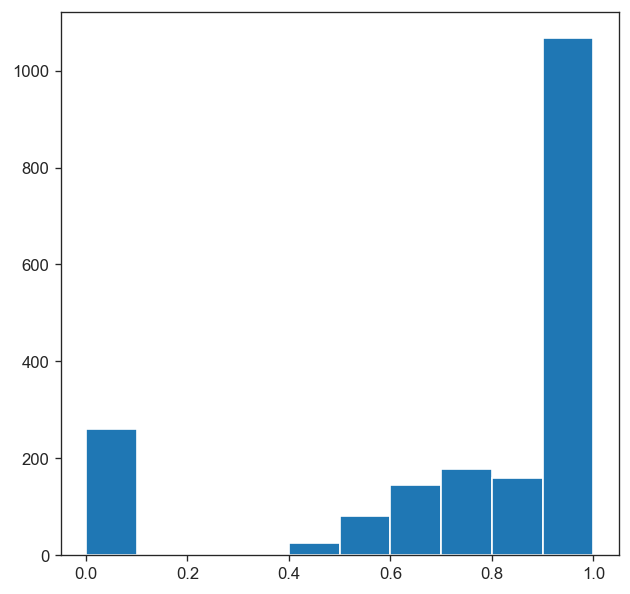

In [481]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=120)
ax.hist(df["cluster_probability"])

<AxesSubplot:xlabel='mds1', ylabel='mds2'>

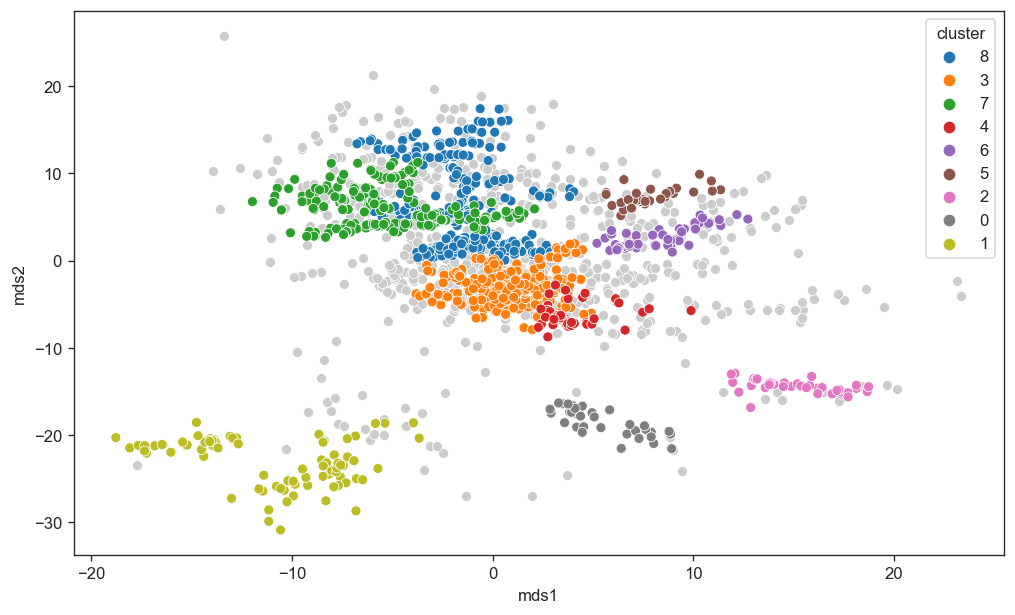

In [482]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=120)
sns.scatterplot(
    data=df.query("(cluster == '-1') | (cluster_probability < 0.8)"),
    x="mds1",
    y="mds2",
    color="#cccccc",
    ax=ax,
)

sns.scatterplot(
    data=df.query("(cluster != '-1') & (cluster_probability >= 0.8)"),
    x="mds1",
    y="mds2",
    hue="cluster",
    ax=ax,
)

<AxesSubplot:xlabel='mds3', ylabel='mds4'>

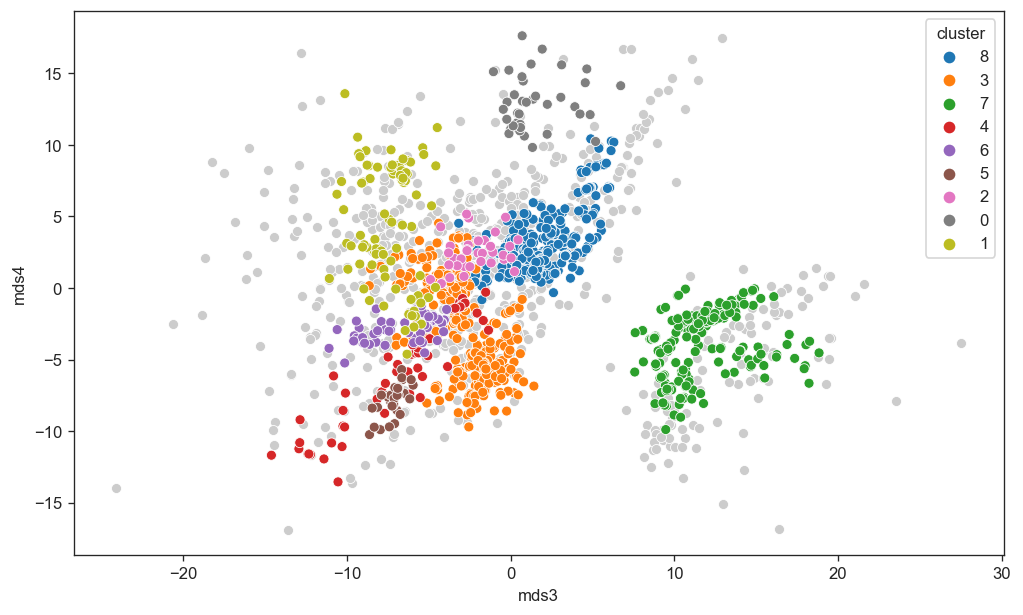

In [483]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=120)
sns.scatterplot(
    data=df.query("(cluster == '-1') | (cluster_probability < 0.8)"),
    x="mds3",
    y="mds4",
    color="#cccccc",
    ax=ax,
)

sns.scatterplot(
    data=df.query("(cluster != '-1') & (cluster_probability >= 0.8)"),
    x="mds3",
    y="mds4",
    hue="cluster",
    ax=ax,
)

<AxesSubplot:xlabel='mds5', ylabel='mds6'>

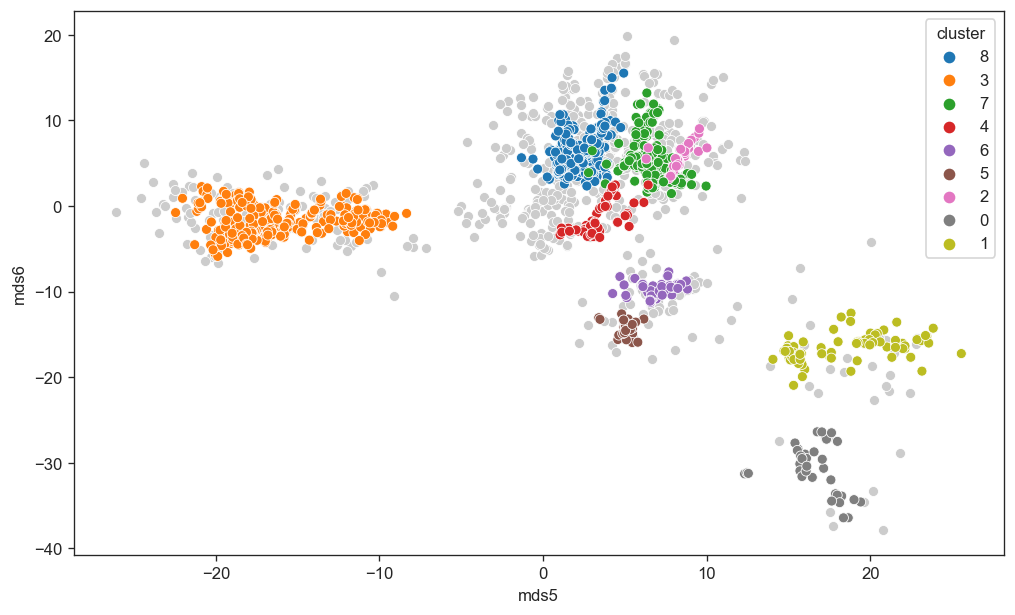

In [484]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=120)
sns.scatterplot(
    data=df.query("(cluster == '-1') | (cluster_probability < 0.8)"),
    x="mds5",
    y="mds6",
    color="#cccccc",
    ax=ax,
)

sns.scatterplot(
    data=df.query("(cluster != '-1') & (cluster_probability >= 0.8)"),
    x="mds5",
    y="mds6",
    hue="cluster",
    ax=ax,
)

In [485]:
df.query("(cluster != '-1') & (cluster_probability >= 0.8)").to_csv(
    "auspice/clusters.tsv",
    sep="\t",
    index=False,
    columns=["strain", "cluster"]
)

In [486]:
!ls -l auspice/clusters.tsv

-rw-r--r--  1 jlhudd  staff  28273 Dec 19 21:31 auspice/clusters.tsv


In [487]:
!head auspice/clusters.tsv

strain	cluster
A/Alabama/15/2016	8
A/Connecticut/34/2016	8
A/Sydney/25/2017	8
A/Alabama/21/2017	8
A/Brisbane/1014/2016	8
A/Darwin/1002/2016	8
A/Newcastle/30/2016	8
A/Newcastle/64/2016	8
A/Newcastle/78/2016	8


In [138]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=30,
    min_samples=15,
    prediction_data=True,
)

In [139]:
clusterer.fit(projection)

HDBSCAN(min_cluster_size=30, min_samples=15, prediction_data=True)

In [140]:
soft_clusters = hdbscan.all_points_membership_vectors(clusterer)

In [141]:
soft_clusters.shape

(1918, 18)

<AxesSubplot:>

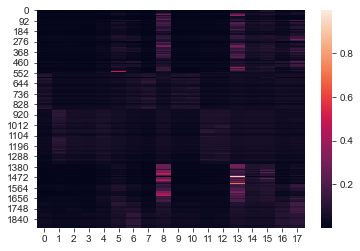

In [142]:
sns.heatmap(soft_clusters)

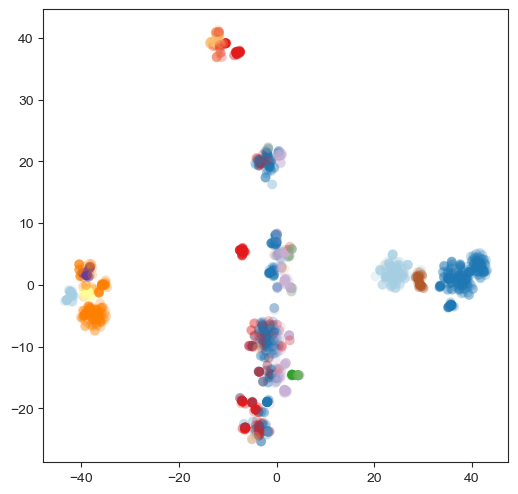

In [145]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=100)
color_palette = sns.color_palette('Paired', 18)
cluster_colors = [color_palette[np.argmax(x)]
                  for x in soft_clusters]
ax.scatter(*projection.T, s=50, linewidth=0, c=cluster_colors, alpha=0.25)

<AxesSubplot:>

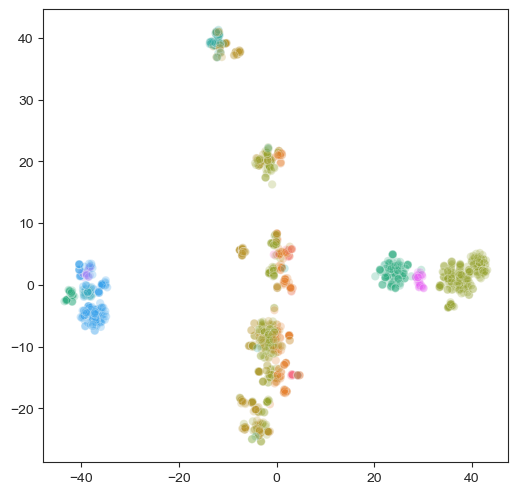

In [154]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=100)
color_palette = sns.color_palette('Paired', 18)
cluster_colors = [color_palette[np.argmax(x)]
                  for x in soft_clusters]
sns.scatterplot(
    x=projection[:, 0],
    y=projection[:, 1],
    hue=cluster_colors,
    alpha=0.25,
    legend=False,
)

<AxesSubplot:>

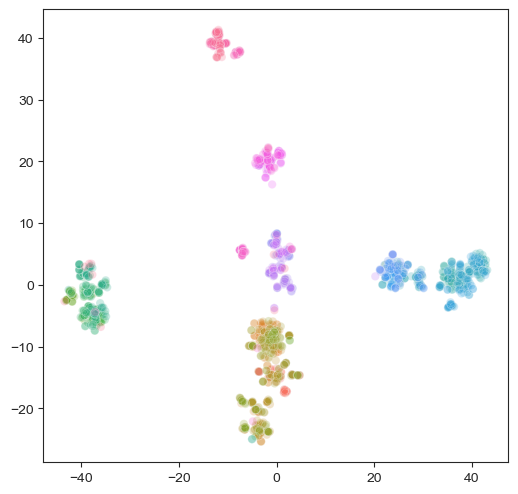

In [153]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=100)
color_palette = sns.color_palette('Paired', 18)
cluster_colors = [sns.desaturate(color_palette[np.argmax(x)], np.max(x))
                  for x in soft_clusters]
sns.scatterplot(
    x=projection[:, 0],
    y=projection[:, 1],
    hue=cluster_colors,
    alpha=0.25,
    legend=False,
)

In [161]:
soft_clusters[10].max()

0.08112452130039778

In [162]:
soft_clusters[100].max()

0.15897740776832603

In [163]:
soft_clusters[200].max()

0.09302888801513892

In [167]:
soft_clusters[170]

array([0.01033131, 0.01142874, 0.01041063, 0.00984839, 0.01977315,
       0.04779379, 0.02342935, 0.01162035, 0.11660187, 0.01118288,
       0.01123129, 0.01366218, 0.01625735, 0.1334456 , 0.04992982,
       0.06242893, 0.0336468 , 0.07570264])

In [168]:
def top_two_probs_diff(probs):
    sorted_probs = np.sort(probs)
    return sorted_probs[-1] - sorted_probs[-2]

# Compute the differences between the top two probabilities
diffs = np.array([top_two_probs_diff(x) for x in soft_clusters])
# Select out the indices that have a small difference, and a larger total probability
mixed_points = np.where((diffs < 0.001) & (np.sum(soft_clusters, axis=1) > 0.5))[0]

In [170]:
mixed_points

array([  30,  148,  153,  220,  248,  307,  309,  410,  532,  560,  660,
        684,  693,  741,  751,  797,  814,  839, 1373, 1374, 1544, 1547,
       1548, 1549, 1552, 1553, 1657, 1674, 1789, 1848, 1855, 1856, 1857,
       1864, 1865, 1867, 1868, 1884, 1887, 1892, 1896])

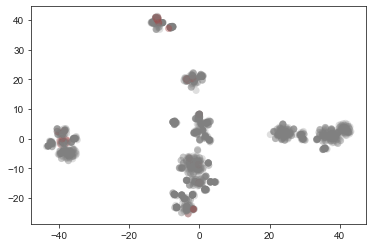

In [173]:
colors = [(0.75, 0.1, 0.1) if x in mixed_points
          else (0.5, 0.5, 0.5) for x in range(projection.shape[0])]
plt.scatter(*projection.T, s=50, linewidth=0, c=colors, alpha=0.25)